# Compare Stanford and Operator QC Criteria
Code author: Sahar H. El Abbadi
Date started: 2022-03-02
Date last edited: 2022-03-02

# Data Description

Metered data for all airplane testing days is saved in the directory "daily_meter_data". Generate by Philippine Burdeau from Coriolis meter raw data and cleaned in the data processing pipeline.

Columns:
- Date and time are in UTC
- Release rate is in kg/h
- Coriolis Meter (for sensor and transmitter identification numbers and serial numbers, see methods documentation):
    - Baby Corey refers to CMFS015H meter
    - Mama Corey refers to CMF050M meter
    - Papa Corey refres to CMFS150M meter
- QC Flags:
    - 0: no QC flag, original data is good quality
    - 1: non-testing period
    - 2: original data missing, filled as described in data analysis section of methods documentation
    - 3: original data value is below accuracy threshold and replaced with NA


In [36]:
import pathlib
import pandas as pd

# Load the dataframe from the .xlsx file

def load_daily_meter_data(date):
    """Load daily meter file saved in format mm_dd.xlsx"""

    # File location
    date_path = pathlib.PurePath('02_meter_data', 'daily_meter_data', f'{date}.xlsx')

    # Import data and rename columns to machine readable format
    date_meter = pd.read_excel(date_path, header=None, names=['datetime_utc', 'flow_rate', 'meter', 'qc_flag'], skiprows=1)
    date_meter.loc[date_meter['meter']=='Baby Coriolis', 'meter'] = 'bc'
    date_meter.loc[date_meter['meter']=='Mama Coriolis', 'meter'] = 'mc'
    date_meter.loc[date_meter['meter']=='Papa Coriolis', 'meter'] = 'pc'

    return date_meter


In [2]:
# Make dataframes for start and end time of each day of testing

# Imports
import datetime
# Carbon Mapper
cm_flight_days = {
    "date": ['10_10', '10_11', '10_12', '10_28', '10_29', '10_31'],
    "start_time": [
        datetime.datetime(2022, 10, 10, 17, 00, 00),
        datetime.datetime(2022, 10, 11, 17, 16, 13),
        datetime.datetime(2022, 10, 12, 17, 15, 16),
        datetime.datetime(2022, 10, 28, 17, 51, 5),
        datetime.datetime(2022, 10, 29, 17, 13, 30),
        datetime.datetime(2022, 10, 31, 17, 16, 46),
                 ],
    "end_time": [
        datetime.datetime(2022, 10, 10, 21, 30, 14),
        datetime.datetime(2022, 10, 11, 21, 16, 36),
        datetime.datetime(2022, 10, 12, 21, 15, 23),
        datetime.datetime(2022, 10, 28, 21, 7, 0),
        datetime.datetime(2022, 10, 29, 21, 11, 34),
        datetime.datetime(2022, 10, 31, 21, 14, 22),
                 ],
}

# Kairos
kairos_flight_days = {
    "date": ['10_24', '10_25', '10_26', '10_27', '10_28'],
    "start_time": [
        datetime.datetime(2022, 10, 24, 16, 46, 28),
        datetime.datetime(2022, 10, 25, 16, 36, 27),
        datetime.datetime(2022, 10, 26, 16, 38, 47),
        datetime.datetime(2022, 10, 27, 16, 37, 23),
        datetime.datetime(2022, 10, 28, 16, 41, 12),
                 ],
    "end_time": [
        datetime.datetime(2022, 10, 24, 19, 48, 44),
        datetime.datetime(2022, 10, 25, 20, 33, 1),
        datetime.datetime(2022, 10, 26, 20, 40, 55),
        datetime.datetime(2022, 10, 27, 20, 14, 15),
        datetime.datetime(2022, 10, 28, 20, 39, 58),
                 ],
}

# MAIR
mair_flight_days = {
    "date": ['10_25', '10_29'],
    "start_time": [
        datetime.datetime(2022, 10, 25, 16, 57, 47),
        datetime.datetime(2022, 10, 29, 16, 25, 1),
                 ],
    "end_time": [
        datetime.datetime(2022, 10, 25, 20, 46, 41),
        datetime.datetime(2022, 10, 29, 21, 2, 17),
                 ],
}

# GHGSat
ghg_flight_days = {
    "date": ['10_31', '11_02', '11_04', '11_07'],
    "start_time": [
        datetime.datetime(2022, 10, 31, 17, 3, 58),
        datetime.datetime(2022, 11, 2, 16, 38, 30),
        datetime.datetime(2022, 11, 4, 16, 43, 19),
        datetime.datetime(2022, 11, 7, 19, 23, 44),
                 ],
    "end_time": [
        datetime.datetime(2022, 10, 31, 20, 59, 3),
        datetime.datetime(2022, 11, 2, 18, 5, 2),
        datetime.datetime(2022, 11, 4, 20, 31, 59),
        datetime.datetime(2022, 11, 7, 22, 9, 39),
                 ],
}

sciav_flight_days = {
    "date": ['11_08', '11_10', '11_11'],
    "start_time": [
        datetime.datetime(2022, 11, 8, 21, 41, 2),
        datetime.datetime(2022, 11, 10, 18, 5, 1),
        datetime.datetime(2022, 11, 10, 19, 10, 45),
                 ],
    "end_time": [
        datetime.datetime(2022, 11, 8, 23, 55, 3),
        datetime.datetime(2022, 11, 10, 22, 5, 52),
        datetime.datetime(2022, 11, 11, 23, 42, 00),
                 ],
}

# Convert dictionaries to pandas dataframes

cm_flight_days = pd.DataFrame.from_dict(cm_flight_days)
ghg_flight_days = pd.DataFrame.from_dict(ghg_flight_days)
kairos_flight_days = pd.DataFrame.from_dict(kairos_flight_days)
mair_flight_days = pd.DataFrame.from_dict(mair_flight_days)
sciav_flight_days = pd.DataFrame.from_dict(sciav_flight_days)


In [ ]:
# Make Carbon Mapper plot
import matplotlib.pyplot as plt
dates = cm_flight_days.date
days_testing = len(dates)

# Initialize dictionary
cm_releases = {}

for i in range(len(dates)):
    day = dates[i]
    date_meter = load_daily_meter_data(day)

    # Select start and end time on the day in question
    start_t = cm_flight_days.start_time[i]
    end_t = cm_flight_days.end_time[i]

    test_period = date_meter[(date_meter.datetime_utc > start_t) & (date_meter.datetime_utc <= end_t)]
    cm_releases[day] = test_period

print(cm_releases)


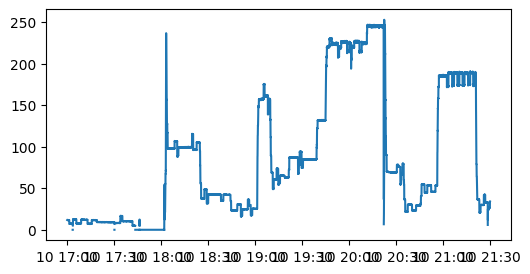

In [55]:
operator = 'Carbon Mapper'

day = '10_10' # iterate through days in a for loop later
daily_data = cm_releases[day]

x_data = daily_data['datetime_utc']
y_data = daily_data['flow_rate']

fig, ax = plt.subplots(1, figsize=(6,3))
plt.plot(x_data, y_data)

In [30]:
test = date_meter.datetime_utc[0]
start_t = cm_flight_days.start_time[0]
print(start_t)
print(test)
date_meter.loc[date_meter.datetime_utc > start_t]

2022-10-10 17:00:00
2022-10-10 16:15:00


,datetime_utc,flow_rate,meter,qc_flag
2701,2022-10-10 17:00:01,11.74968,mc,0
2702,2022-10-10 17:00:02,11.62548,mc,0
2703,2022-10-10 17:00:03,11.70432,mc,0
2704,2022-10-10 17:00:04,11.60676,mc,0
2705,2022-10-10 17:00:05,11.63736,mc,0
...,...,...,...,...
19796,2022-10-10 21:44:56,0.00000,mc,2
19797,2022-10-10 21:44:57,0.00000,mc,2
19798,2022-10-10 21:44:58,0.00000,mc,2
19799,2022-10-10 21:44:59,0.00000,mc,2


In [45]:
print(date_meter[(date_meter.datetime_utc > start_t) & (date_meter.datetime_utc <= end_t)])

             datetime_utc   flow_rate meter  qc_flag
3803  2022-10-31 17:16:47  114.184800    mc        0
3804  2022-10-31 17:16:48  114.202800    mc        0
3805  2022-10-31 17:16:49  114.246000    mc        0
3806  2022-10-31 17:16:50  114.300000    mc        0
3807  2022-10-31 17:16:51  114.328800    mc        0
...                   ...         ...   ...      ...
18054 2022-10-31 21:14:18  556.305231    pc        2
18055 2022-10-31 21:14:19  556.144615    pc        2
18056 2022-10-31 21:14:20  555.984000    pc        0
18057 2022-10-31 21:14:21  556.002000    pc        2
18058 2022-10-31 21:14:22  556.020000    pc        0

[14256 rows x 4 columns]


In [22]:
print(start_t)

0   2022-10-10 17:00:00
Name: start_time, dtype: datetime64[ns]
